# Project 2
## Regression for Prediction Problems
### Monica, Jasmine, Paul

# Importing data into Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Diabetes with Population Info by County 2017.csv") # importing data

In [3]:
data.head() #checking data out

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [4]:
data.info(verbose = True) #checking data types and variables, 
                          # seems like Diabetes_Number (and some others) are not integers...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3220 non-null   object 
 1   State                                                                                                                                                 3220 non-null   object 
 2   CountyFIPS                                                                                                                                            3220 non-null   int64 

In [5]:
#data.Diabetes_Number = data.Diabetes_Number.astype(int) # gets error bc of "No Data" value, not coercable to an integer

In [6]:
clean = data[data.Diabetes_Number != "Suppressed"] 
clean = clean[clean.Obesity_Number != "No Data"]
clean = clean[clean.iloc[:,6] != "-"]
# cleaning data to drop these rows bc we can't do anything with them

In [7]:
clean.iloc[:,3:6] = clean.iloc[:,3:6].astype(int) 
clean.iloc[:,6] = clean.iloc[:,6].astype(float)
# making all number columns into integer or float data types

In [8]:
clean.info(verbose = True) # double checking data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3112 non-null   object 
 1   State                                                                                                                                                 3112 non-null   object 
 2   CountyFIPS                                                                                                                                            3112 non-null   int64 

In [9]:
clean.select_dtypes(include = "object").head() # Checking any last non-number columns

,County,State
0,Autauga County,Alabama
1,Baldwin County,Alabama
2,Barbour County,Alabama
3,Bibb County,Alabama
4,Blount County,Alabama


# 2. Exploratory Data Analysis



## Background literature on diabetes risk factors

From https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

Risk factors for prediabetes and type 2 diabetes

Researchers don't fully understand why some people develop prediabetes and type 2 diabetes and others don't. It's clear that certain factors increase the risk, however, including:

Weight. The more fatty tissue you have, the more resistant your cells become to insulin.
Inactivity. The less active you are, the greater your risk. Physical activity helps you control your weight, uses up glucose as energy and makes your cells more sensitive to insulin. 

Family history. Your risk increases if a parent or sibling has type 2 diabetes.

Race or ethnicity. Although it's unclear why, certain people — including Black, Hispanic, American Indian and Asian American people — are at higher risk.

Age. Your risk increases as you get older. This may be because you tend to exercise less, lose muscle mass and gain weight as you age. But type 2 diabetes is also increasing among children, adolescents and younger adults.

Gestational diabetes. If you developed gestational diabetes when you were pregnant, your risk of developing prediabetes and type 2 diabetes later increases. If you gave birth to a baby weighing more than 9 pounds (4 kilograms), you're also at risk of type 2 diabetes.

Polycystic ovary syndrome. For women, having polycystic ovary syndrome — a common condition characterized by irregular menstrual periods, excess hair growth and obesity — increases the risk of diabetes.
High blood pressure. Having blood pressure over 140/90 millimeters of mercury (mm Hg) is linked to an increased risk of type 2 diabetes.

Abnormal cholesterol and triglyceride levels. If you have low levels of high-density lipoprotein (HDL), or "good," cholesterol, your risk of type 2 diabetes is higher. Triglycerides are another type of fat carried in the blood. People with high levels of triglycerides have an increased risk of type 2 diabetes. Your doctor can let you know what your cholesterol and triglyceride levels are.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## Exploratory Graphs

Looking at a few different potential relationships based on the Mayo clinic info (obesity, physical inactivity, age, and race/ethnicity). 

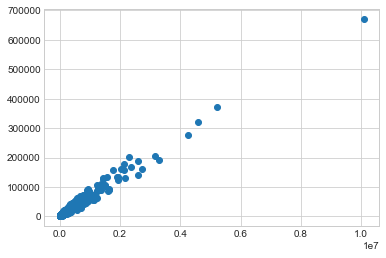

In [11]:
plt.plot(clean.iloc[:,7], clean.Diabetes_Number, 'o');
# just trying to see if population size itself is correlated w/ diabetes rates 

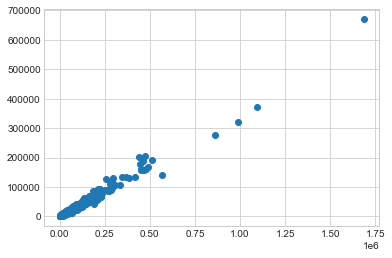

In [12]:
plt.plot(clean.Obesity_Number.astype(int), clean.Diabetes_Number, 'o');

# Seems like  linear relationship between obesity rates and diabetes rates? 



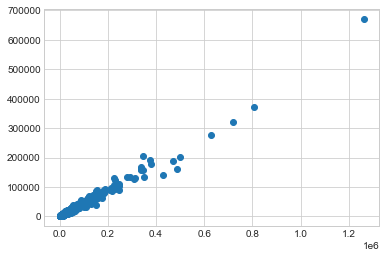

In [13]:
plt.plot(clean.Physical_Inactivity_Number, clean.Diabetes_Number, 'o');
# Relationship between physical inactivity rates and diabetes rates
# Somewhat linear too!

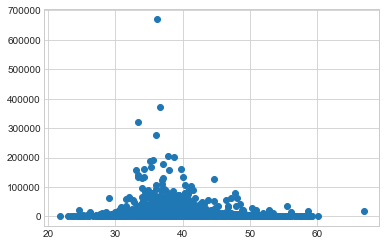

In [14]:
plt.plot(clean.iloc[:,81], clean.Diabetes_Number, 'o');
# looks like median age doesn't say too much

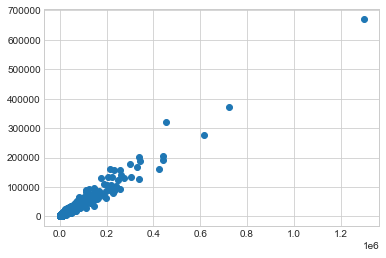

In [15]:
plt.plot(clean.iloc[:,87], clean.Diabetes_Number, 'o');
# population 65 yrs and older
# linear !

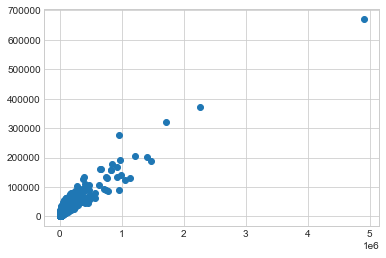

In [16]:
nonwhitepopulation = clean.iloc[:,7] - clean.iloc[:,11]

plt.plot(nonwhitepopulation, clean.Diabetes_Number, 'o');

# the proportion of the county population that is NOT monoracial white 
# doesn't seem to be strongly correlated

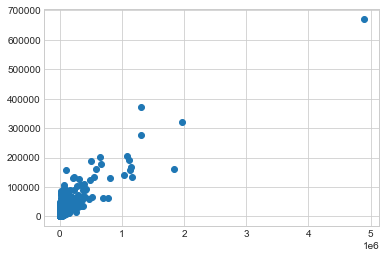

In [17]:
hispanicpopulation = clean.iloc[:,45]
plt.plot(hispanicpopulation, clean.Diabetes_Number, 'o');
# proportion of county population that is hispanic (of any race)

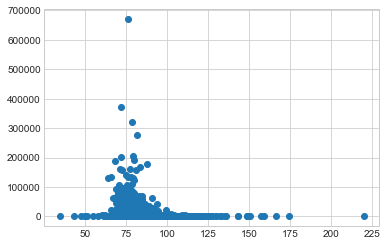

In [18]:
plt.plot(clean.iloc[:,6], clean.Diabetes_Number, 'o');
# sex ratio (males per 100 females), above 65
# also doesn't seem to be strongly correlated

# Prepare to fit models

In [19]:
from sklearn import preprocessing

# normalizing all the data 
# (pulled from https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame)

clean2 = clean.drop(["County", "CountyFIPS", "Diabetes_Number"], 1) # dropping county labels and the dependent variable
clean2 = pd.get_dummies(clean2) # dummifying the state feature 

#Monica added on 10.18
min_max_scaler = preprocessing.MinMaxScaler()

# normalizing features 
X = pd.DataFrame(min_max_scaler.fit_transform(clean2), columns=clean2.columns, index=clean2.index) 




    
# making y    
y = clean.Diabetes_Number


In [20]:
# double check data 

X.info(verbose = True)
y

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 0 to 3219
Data columns (total 142 columns):
 #   Column                                                                                                                                                Dtype  
---  ------                                                                                                                                                -----  
 0   Obesity_Number                                                                                                                                        float64
 1   Physical_Inactivity_Number                                                                                                                            float64
 2   sex and age_total population_65 years and over_sex ratio (males per 100 females)                                                                      float64
 3   race_total population                                                   

0        5178
1       16707
2        3400
3        2371
4        6282
        ...  
3215     2560
3216      439
3217     1440
3218      637
3219      601
Name: Diabetes_Number, Length: 3112, dtype: int64

## 3.2 Partition Data

In [21]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [22]:
# set the random seed
np.random.seed(10)

# split the data into training and test data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20)

In [23]:
# then split the training data for cross validation (actual training data and then cross-validation set)
# Returns 4 values: X_train, X_validate, y_train, y_validate

np.random.seed(10)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size=0.75, test_size=0.25)

# 3.3 Feature Selection

In [24]:
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg

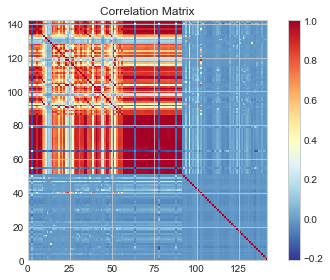

In [25]:
#from https://www.statsmodels.org/stable/generated/statsmodels.graphics.correlation.plot_corr.html#statsmodels.graphics.correlation.plot_corr
# checking pairwise correlation for all the Xs 
# seems to be that a lot of the county population features are highly correlated 
# and all the less correlated features are probably the dummies for each of the states

corr_matrix = np.corrcoef(X_train.T)
smg.plot_corr(corr_matrix)
plt.show()

In [26]:
# checking correlation with Obesity Number
# not sure what is too high to drop... I think if we are only concerned w/ prediction correlation doesn't matter, 
# but anything more than 0.95 correlation seems way too high 

# can play around with this to see what variables drop out!

corrs = corr_matrix[0,:] < 0.95

corrs[0] = True

print(X_train.columns[~corrs]) # these are the variables to be dropped (bc they have almost perfect correlation)

# makes sense that Physical_Inactivity will be dropped
# makes sense that a lot that are being dropped are measures of size of whole population
    # e.g., all total population counts, total monoracial population, total citizens

Index(['Physical_Inactivity_Number', 'race_total population',
       'race_total population_one race', 'race_total population_one race_1',
       'race_total population_one race_white',
       'race alone or in combination with one or more other races_total population',
       'race alone or in combination with one or more other races_total population_white',
       'hispanic or latino and race_total population',
       'hispanic or latino and race_total population_not hispanic or latino',
       'total housing units',
       'citizen -  voting age population_citizen -  18 and over population',
       'citizen -  voting age population_citizen -  18 and over population_male',
       'citizen -  voting age population_citizen -  18 and over population_female',
       'sex and age_total population', 'sex and age_total population_male',
       'sex and age_total population_female',
       'sex and age_total population_under 5 years',
       'sex and age_total population_5 to 9 years',
     

In [27]:
# taking out all features that have a correlation higher than 0.95, 101 features remain

X_train = X_train[X_train.columns[corrs]]
X_validate = X_validate[X_validate.columns[corrs]]
X_test = X_test[X_test.columns[corrs]]
X_train.info(verbose = True) 

# makes sense that a lot of the subgroup features are left (e.g., total Black population) 
# and also all(?) the state dummy variables 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 2050 to 2124
Data columns (total 101 columns):
 #   Column                                                                                                                                                Dtype  
---  ------                                                                                                                                                -----  
 0   Obesity_Number                                                                                                                                        float64
 1   sex and age_total population_65 years and over_sex ratio (males per 100 females)                                                                      float64
 2   race_total population_two or more races                                                                                                               float64
 3   race_total population_one race_black or african american             

## Normal OLS

In [28]:
# just gonna run a normal OLS

lin_reg = LinearRegression(normalize=True)

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

In [29]:
print(lin_model.coef_)
print(lin_model.intercept_)
print(lin_model.coef_.shape)

[ 4.44596580e+05 -2.85737925e+03  1.67917933e+16 -5.58728595e+06
 -6.74208966e+04  1.00686106e+03 -5.04811356e+02 -1.07904614e+04
 -5.28766731e+02 -5.51553971e+15  6.57883135e+14  1.75212625e+15
  1.28370415e+15  5.17642795e+14  7.98678794e+14  7.86476803e+14
  5.89725339e+14  7.86282798e+15 -4.22522282e+15 -4.30523456e+14
 -1.09405183e+15 -2.32578078e+15 -9.61413329e+06 -1.67917933e+16
  2.90266521e+04  2.15376696e+05  4.06725273e+05 -2.89885171e+04
  5.84578150e+06  1.09004544e+05  1.66790133e+05  7.87461471e+05
  1.02155299e+07 -8.29322419e+14  6.29757259e+14  4.68398426e+13
  1.67047966e+14  1.85061856e+14  6.90475690e+04 -6.27984232e+03
  2.28278444e+04 -6.93496353e+06  1.92942452e+05  2.43278726e+04
  9.00330312e+13 -5.47061148e+12 -8.45624197e+13 -6.08467079e+02
  2.44197472e+03 -1.14574052e+03 -1.63959250e+14 -1.63959250e+14
 -1.63959250e+14 -1.63959250e+14 -1.63959250e+14 -1.63959250e+14
 -1.63959250e+14 -1.63959250e+14 -1.63959250e+14 -1.63959250e+14
 -1.63959250e+14 -1.63959

Text(0.5, 1.0, 'OLS Coefficients')

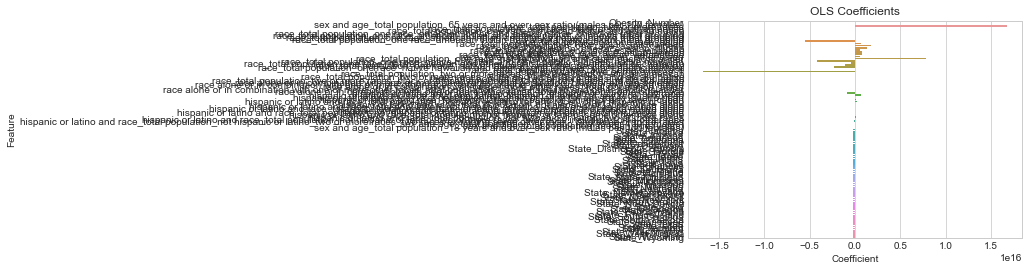

In [30]:
# Create a dataframe with the coefficient and feature names
# this is unintelligible with 101 variables lmao

lin_reg_data = pd.DataFrame([lin_model.coef_, X_train.columns]).T
lin_reg_data.columns = ['Coefficient', 'Feature']
# Plot
ax = sns.barplot(x="Coefficient", y="Feature", data=lin_reg_data)
ax.set_title("OLS Coefficients")

# some of these coefficients seem high since y is normalized, but maybe not an issue bc prediction...


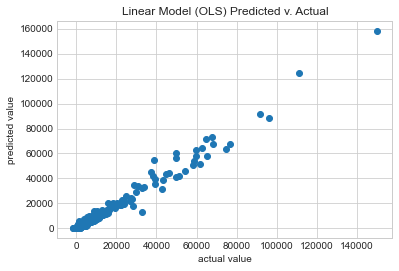

In [31]:
# predict the number of diabetes, using OLS parameters
lin_pred = lin_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.scatter(lin_pred, y_validate)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()


# this looks decent !! but can maybe do better w/ lasso? 

In [32]:
def rmse(pred, actual):
    return pow(np.mean(pow((pred-actual), 2)), 0.5)

In [33]:
rmse(lin_pred, y_validate)

2144.9723039785904

# 4 Train Models 
## 4.1 Model Description
## 4.2 Train Models

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


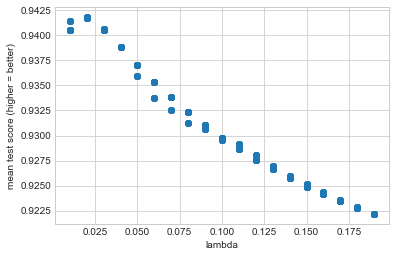

{'alpha': 0.02, 'fit_intercept': 'True', 'normalize': 'True', 'solver': 'lsqr'}
Best CV R^2: 0.9418671400775698
Validation R^2: 0.9744141288473217
Validation RMSE 2298.87269311901


In [34]:
# Ridge alpha search

ridge_reg = Ridge()

param_grid = {'alpha': np.arange(0.01, 0.2, 0.01),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)

plt.scatter(ridge_grid_reg.cv_results_['param_alpha'], ridge_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


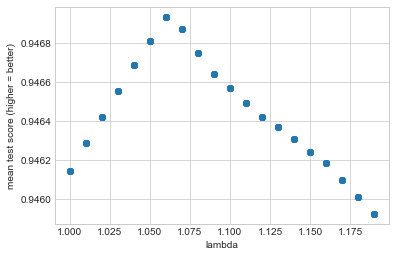

{'alpha': 1.06, 'fit_intercept': 'True', 'normalize': 'True', 'selection': 'cyclic'}
Best CV R^2: 0.9469352132782315
Validation R^2: 0.9831571207355266
Validation RMSE 1865.1895993694102


In [223]:
# Lasso alpha search

#I am not sure about the random method for variable selection, 
# makes it difficult to choose the best Lasso model bc you can't zoom in on a range of lambdas..

# set the random seed
#np.random.seed(20)

param_grid = {'alpha': np.arange(1.0, 1.2, .01),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic']}

lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3, iid=False)
lasso_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)


plt.scatter(lasso_grid_reg.cv_results_['param_alpha'], lasso_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.447e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor,

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.447e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor,

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.447e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor,

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.447e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor,

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.447e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor,

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.447e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor,

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.447e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor,

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.180e+01, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=1.984e+01, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, afte

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=1.984e+01, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=1.905e+01, with an active set of 11 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:597: ConvergenceWarning: Early stopping the lars path, as the residues are small and t

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=4.180e+01, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=1.984e+01, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, afte

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.482e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, af

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.560e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 175 iterations, i.e. alpha=1.447e+01, with an active set of 91 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor,

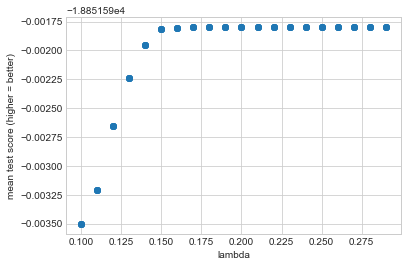

{'alpha': 0.22999999999999995, 'fit_intercept': 'True', 'normalize': 'True'}
Best CV R^2: -18851.59179521044
Validation R^2: 0.9829046009924907
Validation RMSE 1879.1196681431115


In [226]:
# LARS Lasso alpha search 
# https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression
# this did not seem to want to converge...

from sklearn import linear_model

lars_reg = linear_model.LassoLars()

param_grid = {'alpha': np.arange(0.1, 0.3, .01),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False']}

lars_grid_reg = GridSearchCV(lars_reg, param_grid, cv=3, iid=False)
lars_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lars_grid_reg.cv_results_["mean_test_score"])
best_lars_pred = lars_grid_reg.best_estimator_.predict(X_validate)


plt.scatter(lars_grid_reg.cv_results_['param_alpha'], lars_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

print(lars_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lars_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lars_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lars_pred, y_validate))

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371534743172.3364, tolerance: 85166657.61815266
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431002231524.625, tolerance: 97413446.32496294
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277907698936.3235, tolerance: 61570590.51196367
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 737409524.10256, tolerance: 85166657.61815266
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837576539.171298, tolerance: 97413446.32496294
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374490503299.4562, tolerance: 85166657.61815266
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coo

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281078477818.6424, tolerance: 61570590.51196367
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680175641.0858798, tolerance: 85166657.61815266
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777736388.2875447, tolerance: 97413446.32496294
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283641904159.81647, tolerance: 61570590.51196367
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381697920332.5667, tolerance: 85166657.61815266
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441598987956.96936, tolerance: 97413446.32496294
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599280018.1449223, tolerance: 97413446.32496294
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383670789445.06195, tolerance: 85166657.61815266
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443650415729.79114, tolerance: 97413446.32496294
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 523576134.6807761, tolerance: 85166657.61815266
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 636535159.3633661, tolerance: 97413446.32496294
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 523576134.6807761, tolerance: 85166657.61815266
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448826312016.0675, tolerance: 97413446.32496294
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287532625552.0287, tolerance: 61570590.51196367
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255388748.5428195, tolerance: 85166657.61815266
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390065959736.2207, tolerance: 85166657.61815266
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450287821035.7756, tolerance: 97413446.32496294
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288317433442.6876, tolerance: 61570590.51196367
  model = cd_fast.enet_coordinate_descent(
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

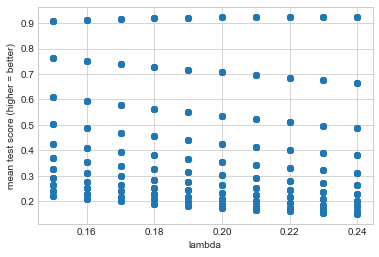

{'alpha': 0.24000000000000007, 'fit_intercept': 'True', 'l1_ratio': 1.0, 'normalize': 'True'}
Best CV R^2: 0.9248666044618167
Validation R^2: 0.983017307607047
Validation RMSE 1872.9150910317974


In [229]:
# Elastic net alpha search 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet
# this doesn't do too well... the benefit of this is that it allows you to use a combination of
# l1 penalty (lasso) and l2 penalty (ridge). It basically wants to go all the way to l1_ratio = 1.0, which
# is the same as a normal lasso regression. 
 
from sklearn import linear_model

eln_reg = linear_model.ElasticNet()

param_grid = {'alpha': np.arange(0.0, 0.2, .01), 
              'l1_ratio': np.arange(0, 1.1, 0.1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False']}

eln_grid_reg = GridSearchCV(eln_reg, param_grid, cv=3, iid=False)
eln_grid_reg.fit(X_train, y_train)

best_index = np.argmax(eln_grid_reg.cv_results_["mean_test_score"])
best_eln_pred = eln_grid_reg.best_estimator_.predict(X_validate)


plt.scatter(eln_grid_reg.cv_results_['param_alpha'], eln_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

print(eln_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(eln_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', eln_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_eln_pred, y_validate))


/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(**kwargs)
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(**kwargs)
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(**kwargs)
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested p

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(**kwargs)
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(**kwargs)
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(**kwargs)
/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested p

/Users/paul/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


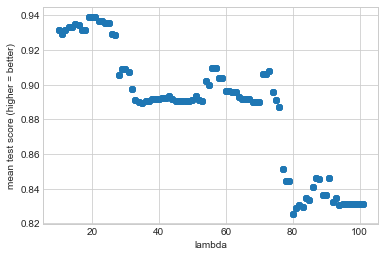

{'fit_intercept': 'True', 'n_nonzero_coefs': 19, 'normalize': 'True'}
Best CV R^2: 0.9391852858169244
Validation R^2: 0.9777280999354824
Validation RMSE 2144.8328466787148


In [231]:
# Orthogonal Matching Pursuit 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.OrthogonalMatchingPursuit.html#sklearn.linear_model.OrthogonalMatchingPursuit


omp_reg = linear_model.OrthogonalMatchingPursuit()

param_grid = {'n_nonzero_coefs': np.arange(round(len(X_train.columns)/10), len(X_train.columns) + 1), 
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False']}

omp_grid_reg = GridSearchCV(omp_reg, param_grid, cv=3, iid=False)
omp_grid_reg.fit(X_train, y_train)

best_index = np.argmax(omp_grid_reg.cv_results_["mean_test_score"])
best_omp_pred = omp_grid_reg.best_estimator_.predict(X_validate)


plt.scatter(omp_grid_reg.cv_results_['param_n_nonzero_coefs'], omp_grid_reg.cv_results_["mean_test_score"])
plt.xlabel('lambda')
plt.ylabel('mean test score (higher = better)')
plt.show()

print(omp_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(omp_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', omp_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_omp_pred, y_validate))



# 5. Validate and Refine Models
## 5.1 Lasso Regression as best model
## 5.2 Feature Selection

Remaining active features:  Index(['Obesity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
       'race_total population_one race_asian_asian indian',
       'race_total population_one race_asian_filipino',
       'race_total population_one race_asian_japanese',
       'race_total population_one race_asian_korean',
       'race_total population_one race_asian_vietnamese',
       'race_total population_one race_native hawaiian and other pacific islander_native hawaiian',
       'race_total population_one race_native hawaiian and other pacific islander_other pacific islander',
       'race_total population_one race_some other race',
       'race_total population_two or more races_white and asian',
       'hispanic or latino and race_total population_hispanic or latino (of

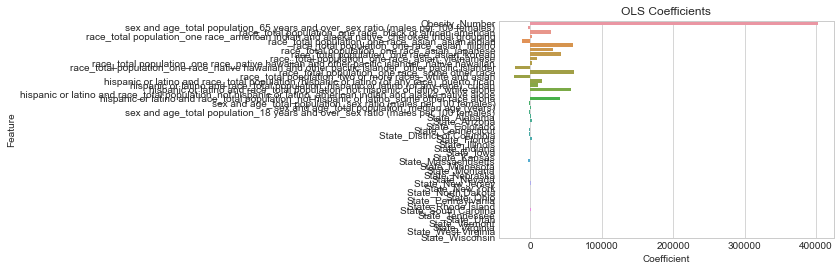

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

#best model: {'alpha': 1.06, 'fit_intercept': 'True', 'normalize': 'True', 'selection': 'cyclic'}
#lowest RMSE of all other techniques

reg = linear_model.Lasso(alpha = 1.06, fit_intercept = True, normalize = True, selection = 'cyclic')
reg.fit(X_train, y_train)
actives = abs(reg.coef_) > 0 


lin_reg_data = pd.DataFrame([reg.coef_[actives], X_train.columns[actives]]).T
lin_reg_data.columns = ['Coefficient', 'Feature']
# Plot
ax = sns.barplot(x="Coefficient", y="Feature", data=lin_reg_data)
ax.set_title("Lasso Coefficients")

print("Remaining active features: ",X_train.columns[actives])
print("Obesity_Number coefficient: ",reg.coef_[0])
print("RMSE: ", rmse(reg.predict(X_validate), y_validate))

In [306]:
# checking which coefficients are very small relative to Obesity_Number

X_train.columns[np.logical_and(abs(reg.coef_) > 0, abs(reg.coef_) < 100)]

Index(['hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone',
       'State_Indiana', 'State_Pennsylvania', 'State_Vermont',
       'State_West Virginia'],
      dtype='object')

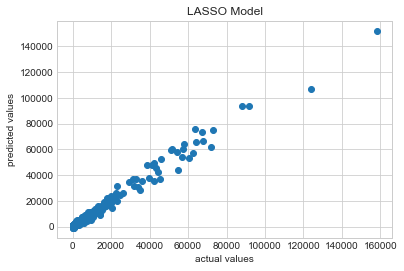

In [38]:
# use the model to make predictions
lasso_pred = reg.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [39]:
# calculate the rmse for the LASSO model
rmse(lasso_pred, y_validate)

#LASSO looks like our winner, winner, chicken dinner! 

1865.1895993694102

# 5.4 Cross-Validation

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = Lasso(alpha = 1.06, fit_intercept = True, normalize = True, selection = 'cyclic')

scores = cross_val_score(clf, X, y, cv=5)
scores
print(scores)
print(np.mean(scores))

[0.96365408 0.98662524 0.99002494 0.96239659 0.98254097]
0.977048365943013


# 6.2 Prioritizing for pilot program